In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [14]:
plt.style.use('seaborn-v0_8')

In [15]:
#load the data in the notebook
file_path = "/Users/breannjohnson/Downloads/spotify_history.csv"
df = pd.read_csv(file_path)
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [16]:
print(df.head())
print(df.info())
print(df.describe())

        spotify_track_uri                   ts    platform  ms_played  \
0  2J3n32GeLmMjwuAzyhcSNe  2013-07-08 02:44:34  web player       3185   
1  1oHxIPqJyvAYHy0PVrDU98  2013-07-08 02:45:37  web player      61865   
2  487OPlneJNni3NWC8SYqhW  2013-07-08 02:50:24  web player     285386   
3  5IyblF777jLZj1vGHG2UD3  2013-07-08 02:52:40  web player     134022   
4  0GgAAB0ZMllFhbNc3mAodO  2013-07-08 03:17:52  web player          0   

                                      track_name        artist_name  \
0                            Say It, Just Say It       The Mowgli's   
1  Drinking from the Bottle (feat. Tinie Tempah)      Calvin Harris   
2                                    Born To Die       Lana Del Rey   
3                               Off To The Races       Lana Del Rey   
4                                      Half Mast  Empire Of The Sun   

                           album_name reason_start reason_end  shuffle  \
0                Waiting For The Dawn     autoplay   clickro

In [17]:
print(df.isnull().sum())

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64


In [18]:
df['ts'] = pd.to_datetime(df['ts'])

In [19]:
df = df.drop_duplicates()

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 148675 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  148675 non-null  object        
 1   ts                 148675 non-null  datetime64[ns]
 2   platform           148675 non-null  object        
 3   ms_played          148675 non-null  int64         
 4   track_name         148675 non-null  object        
 5   artist_name        148675 non-null  object        
 6   album_name         148675 non-null  object        
 7   reason_start       148532 non-null  object        
 8   reason_end         148558 non-null  object        
 9   shuffle            148675 non-null  bool          
 10  skipped            148675 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(7)
memory usage: 11.6+ MB
None


In [21]:
# Most played songs
top_songs = df['track_name'].value_counts().head(10)
print(top_songs)

track_name
Ode To The Mets                      203
In the Blood                         180
Dying Breed                          166
Caution                              155
19 Dias y 500 Noches - En Directo    146
Concerning Hobbits                   142
Come Together - Remastered 2009      136
All These Things That I've Done      136
For What It's Worth                  135
The Boxer                            134
Name: count, dtype: int64


In [22]:
# Most played artists
top_artists = df['artist_name'].value_counts().head(10)
print(top_artists)

artist_name
The Beatles           13530
The Killers            6748
John Mayer             4797
Bob Dylan              3790
Paul McCartney         2685
Led Zeppelin           2470
Johnny Cash            2467
The Rolling Stones     2367
Radiohead              2295
The Black Keys         2221
Name: count, dtype: int64


In [23]:
# Most played albums
top_albums = df['album_name'].value_counts().head(10)
print(top_albums)


album_name
The Beatles                                           2050
Past Masters                                          1667
Abbey Road                                            1421
The Wall                                              1218
Revolver                                              1031
Help!                                                  969
At Folsom Prison                                       917
Sgt. Pepper's Lonely Hearts Club Band                  907
Exile On Main Street                                   884
Where the Light Is: John Mayer Live In Los Angeles     867
Name: count, dtype: int64


/var/folders/5_/w99wll7918q2d7n1v9kjhdjm0000gn/T/ipykernel_5607/2761678454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['ts'].dt.hour
/var/folders/5_/w99wll7918q2d7n1v9kjhdjm0000gn/T/ipykernel_5607/2761678454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_listening.index, y=hourly_listening.values, palette='viridis')


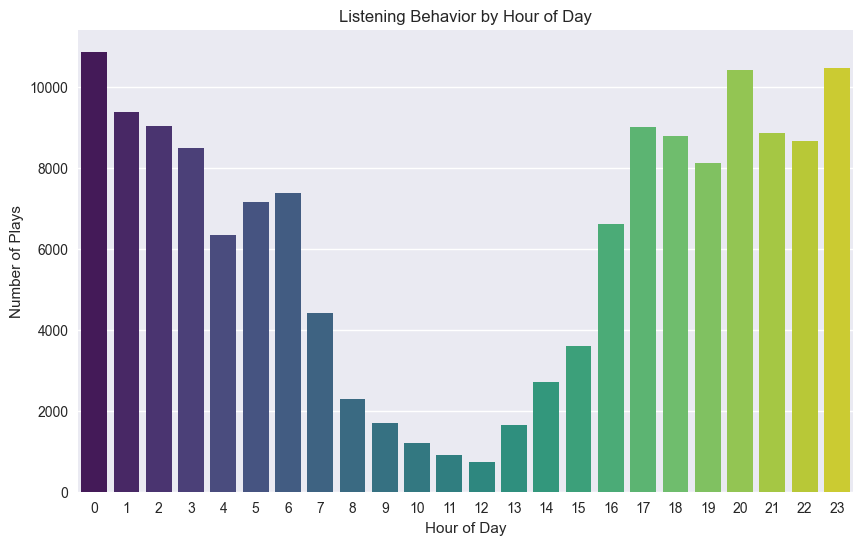

In [24]:
# Listening behavior by time of day
df['hour'] = df['ts'].dt.hour
hourly_listening = df['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_listening.index, y=hourly_listening.values, palette='viridis')
plt.title('Listening Behavior by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Plays')
plt.show()

/var/folders/5_/w99wll7918q2d7n1v9kjhdjm0000gn/T/ipykernel_5607/32543011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['ts'].dt.day_name()
/var/folders/5_/w99wll7918q2d7n1v9kjhdjm0000gn/T/ipykernel_5607/32543011.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_listening.index, y=weekly_listening.values, palette='viridis')


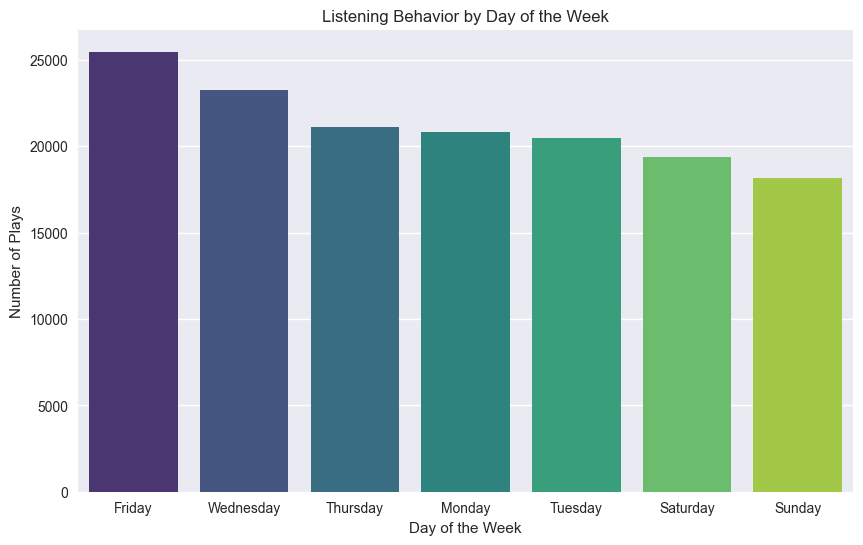

In [25]:
# Listening behavior by day of the week
df['day_of_week'] = df['ts'].dt.day_name()
weekly_listening = df['day_of_week'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_listening.index, y=weekly_listening.values, palette='viridis')
plt.title('Listening Behavior by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Plays')
plt.show()

In [26]:
# Skipping behavior
skipping_behavior = df['skipped'].value_counts()
print(skipping_behavior)

skipped
False    140807
True       7868
Name: count, dtype: int64


In [27]:
# Average duration of songs played
df['minutes_played'] = df['ms_played'] / 60000
avg_duration = df['minutes_played'].mean()
print("Average duration of songs played (in minutes):", avg_duration)

Average duration of songs played (in minutes): 2.134344646600526


/var/folders/5_/w99wll7918q2d7n1v9kjhdjm0000gn/T/ipykernel_5607/186412692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minutes_played'] = df['ms_played'] / 60000


/var/folders/5_/w99wll7918q2d7n1v9kjhdjm0000gn/T/ipykernel_5607/2486410337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['ts'].dt.to_period('M')


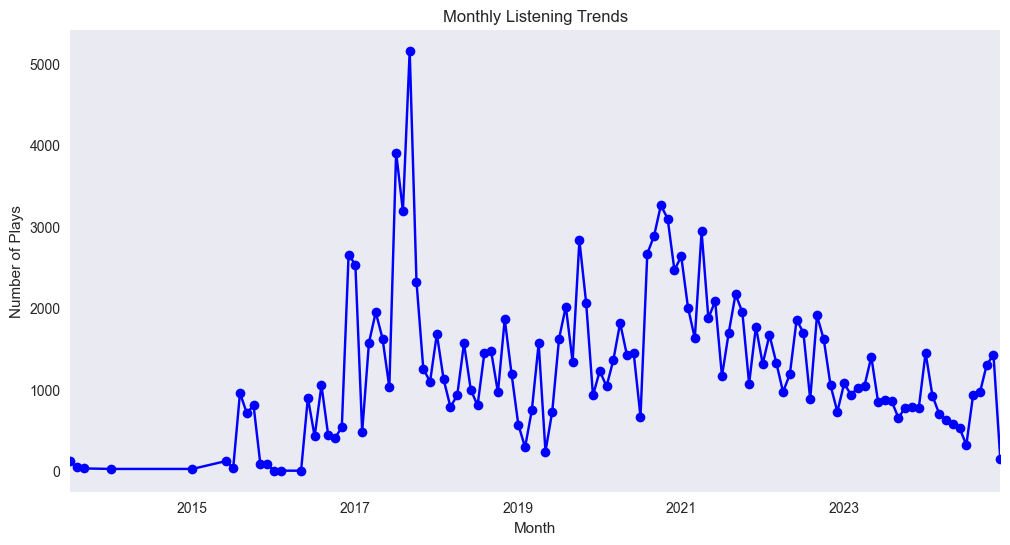

In [28]:
# Monthly listening trends
df['month'] = df['ts'].dt.to_period('M')
monthly_trends = df.groupby('month').size()
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Listening Trends')
plt.xlabel('Month')
plt.ylabel('Number of Plays')
plt.grid()
plt.show()

/var/folders/5_/w99wll7918q2d7n1v9kjhdjm0000gn/T/ipykernel_5607/843352851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_usage.index, y=platform_usage.values, palette='coolwarm')


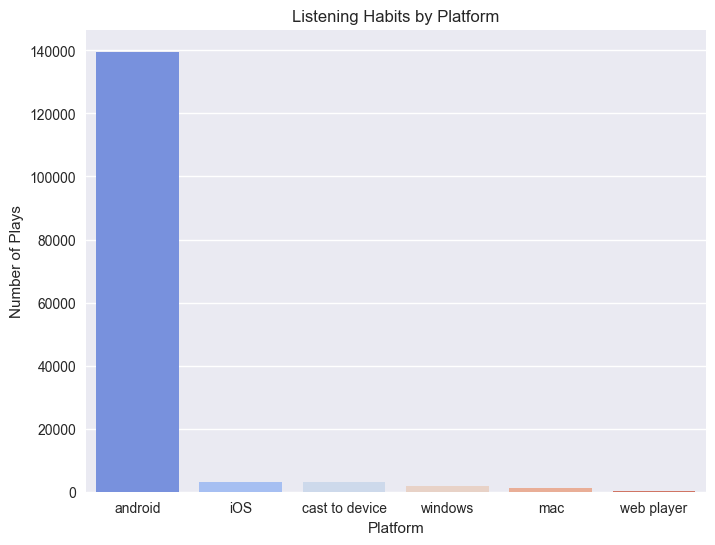

In [29]:
# Listening habits by platform
platform_usage = df['platform'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=platform_usage.index, y=platform_usage.values, palette='coolwarm')
plt.title('Listening Habits by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Plays')
plt.show()

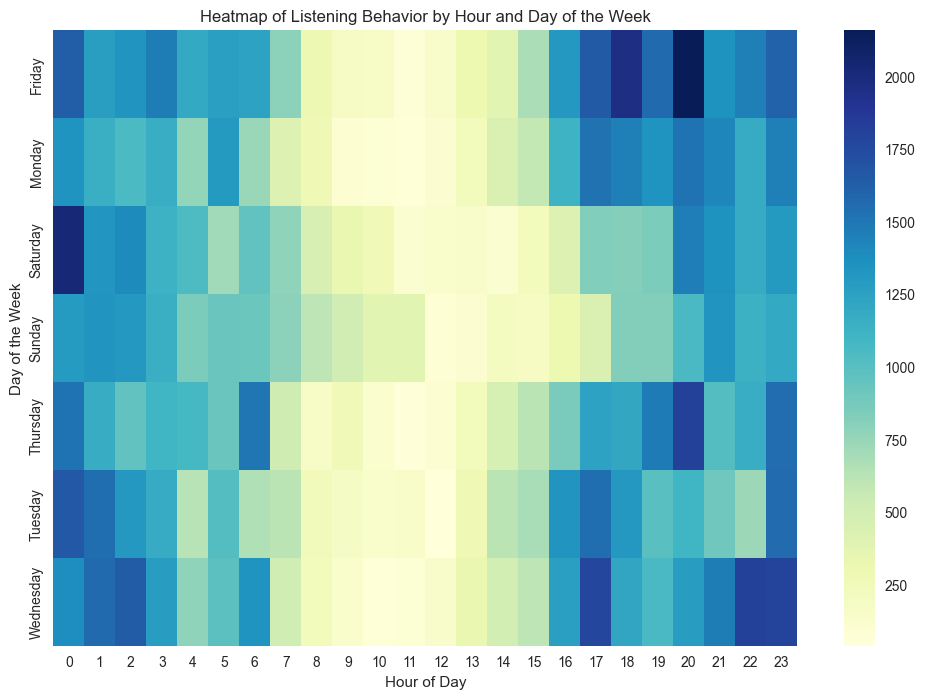

In [30]:
# Heatmap of listening behavior by hour and day of the week
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Listening Behavior by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.show()

In [37]:
skip_rate = (df['skipped'].value_counts(normalize=True) * 100)

In [38]:
# Print results
print("\
Top 10 Artists:")
print(top_artists)
print("\
Platform Usage:")
print(platform_usage)
print("\
Skip Rate (%):")
print(skip_rate)

Top 10 Artists:
artist_name
The Beatles           13530
The Killers            6748
John Mayer             4797
Bob Dylan              3790
Paul McCartney         2685
Led Zeppelin           2470
Johnny Cash            2467
The Rolling Stones     2367
Radiohead              2295
The Black Keys         2221
Name: count, dtype: int64
Platform Usage:
platform
android           139562
iOS                 3049
cast to device      3015
windows             1691
mac                 1176
web player           182
Name: count, dtype: int64
Skip Rate (%):
skipped
False    94.70792
True      5.29208
Name: proportion, dtype: float64
